# Import & Pre-Processing Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('./data/kemayoran 2000-2022.xlsx')

In [6]:
df

,Tanggal,RR
0,01-01-2000,9.1
1,02-01-2000,8888.0
2,03-01-2000,8888.0
3,04-01-2000,50.2
4,05-01-2000,1.6
...,...,...
8151,26-04-2022,26.4
8152,27-04-2022,8888.0
8153,28-04-2022,7.5
8154,29-04-2022,8888.0


In [7]:
df[['tanggal', 'bulan', 'tahun']] = df['Tanggal'].str.split('-', expand=True)
df['tahun_bulan'] = df['tahun'] + '-' + df['bulan']

In [8]:
df

,Tanggal,RR,tanggal,bulan,tahun,tahun_bulan
0,01-01-2000,9.1,01,01,2000,2000-01
1,02-01-2000,8888.0,02,01,2000,2000-01
2,03-01-2000,8888.0,03,01,2000,2000-01
3,04-01-2000,50.2,04,01,2000,2000-01
4,05-01-2000,1.6,05,01,2000,2000-01
...,...,...,...,...,...,...
8151,26-04-2022,26.4,26,04,2022,2022-04
8152,27-04-2022,8888.0,27,04,2022,2022-04
8153,28-04-2022,7.5,28,04,2022,2022-04
8154,29-04-2022,8888.0,29,04,2022,2022-04


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      8156 non-null   object 
 1   RR           7883 non-null   float64
 2   tanggal      8156 non-null   object 
 3   bulan        8156 non-null   object 
 4   tahun        8156 non-null   object 
 5   tahun_bulan  8156 non-null   object 
dtypes: float64(1), object(5)
memory usage: 382.4+ KB


In [10]:
df.groupby('tahun_bulan')['RR'].apply(np.mean)

tahun_bulan
2000-01    1445.958065
2000-02     623.648276
2000-03     289.945161
2000-04    1193.660000
2000-05     291.012903
              ...     
2021-12    1428.944000
2022-01     648.321429
2022-02     369.032000
2022-03       6.286364
2022-04    1377.319231
Name: RR, Length: 268, dtype: float64

In [11]:
avg_data = pd.DataFrame(df.groupby('tahun_bulan')['RR'].apply(np.mean))

In [12]:
avg_data

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2021-12,1428.944000
2022-01,648.321429
2022-02,369.032000


In [13]:
avg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 2000-01 to 2022-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR      268 non-null    float64
dtypes: float64(1)
memory usage: 4.2+ KB


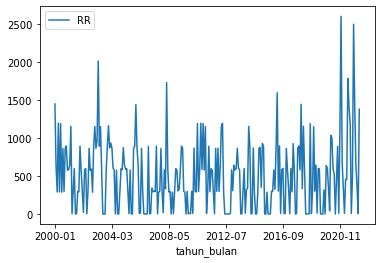

In [14]:
import matplotlib.pyplot as plt

avg_data.plot()
plt.show()

#Modelling Arima (berhasil)

In [15]:
df = avg_data

In [16]:
testing = df.tail(12)

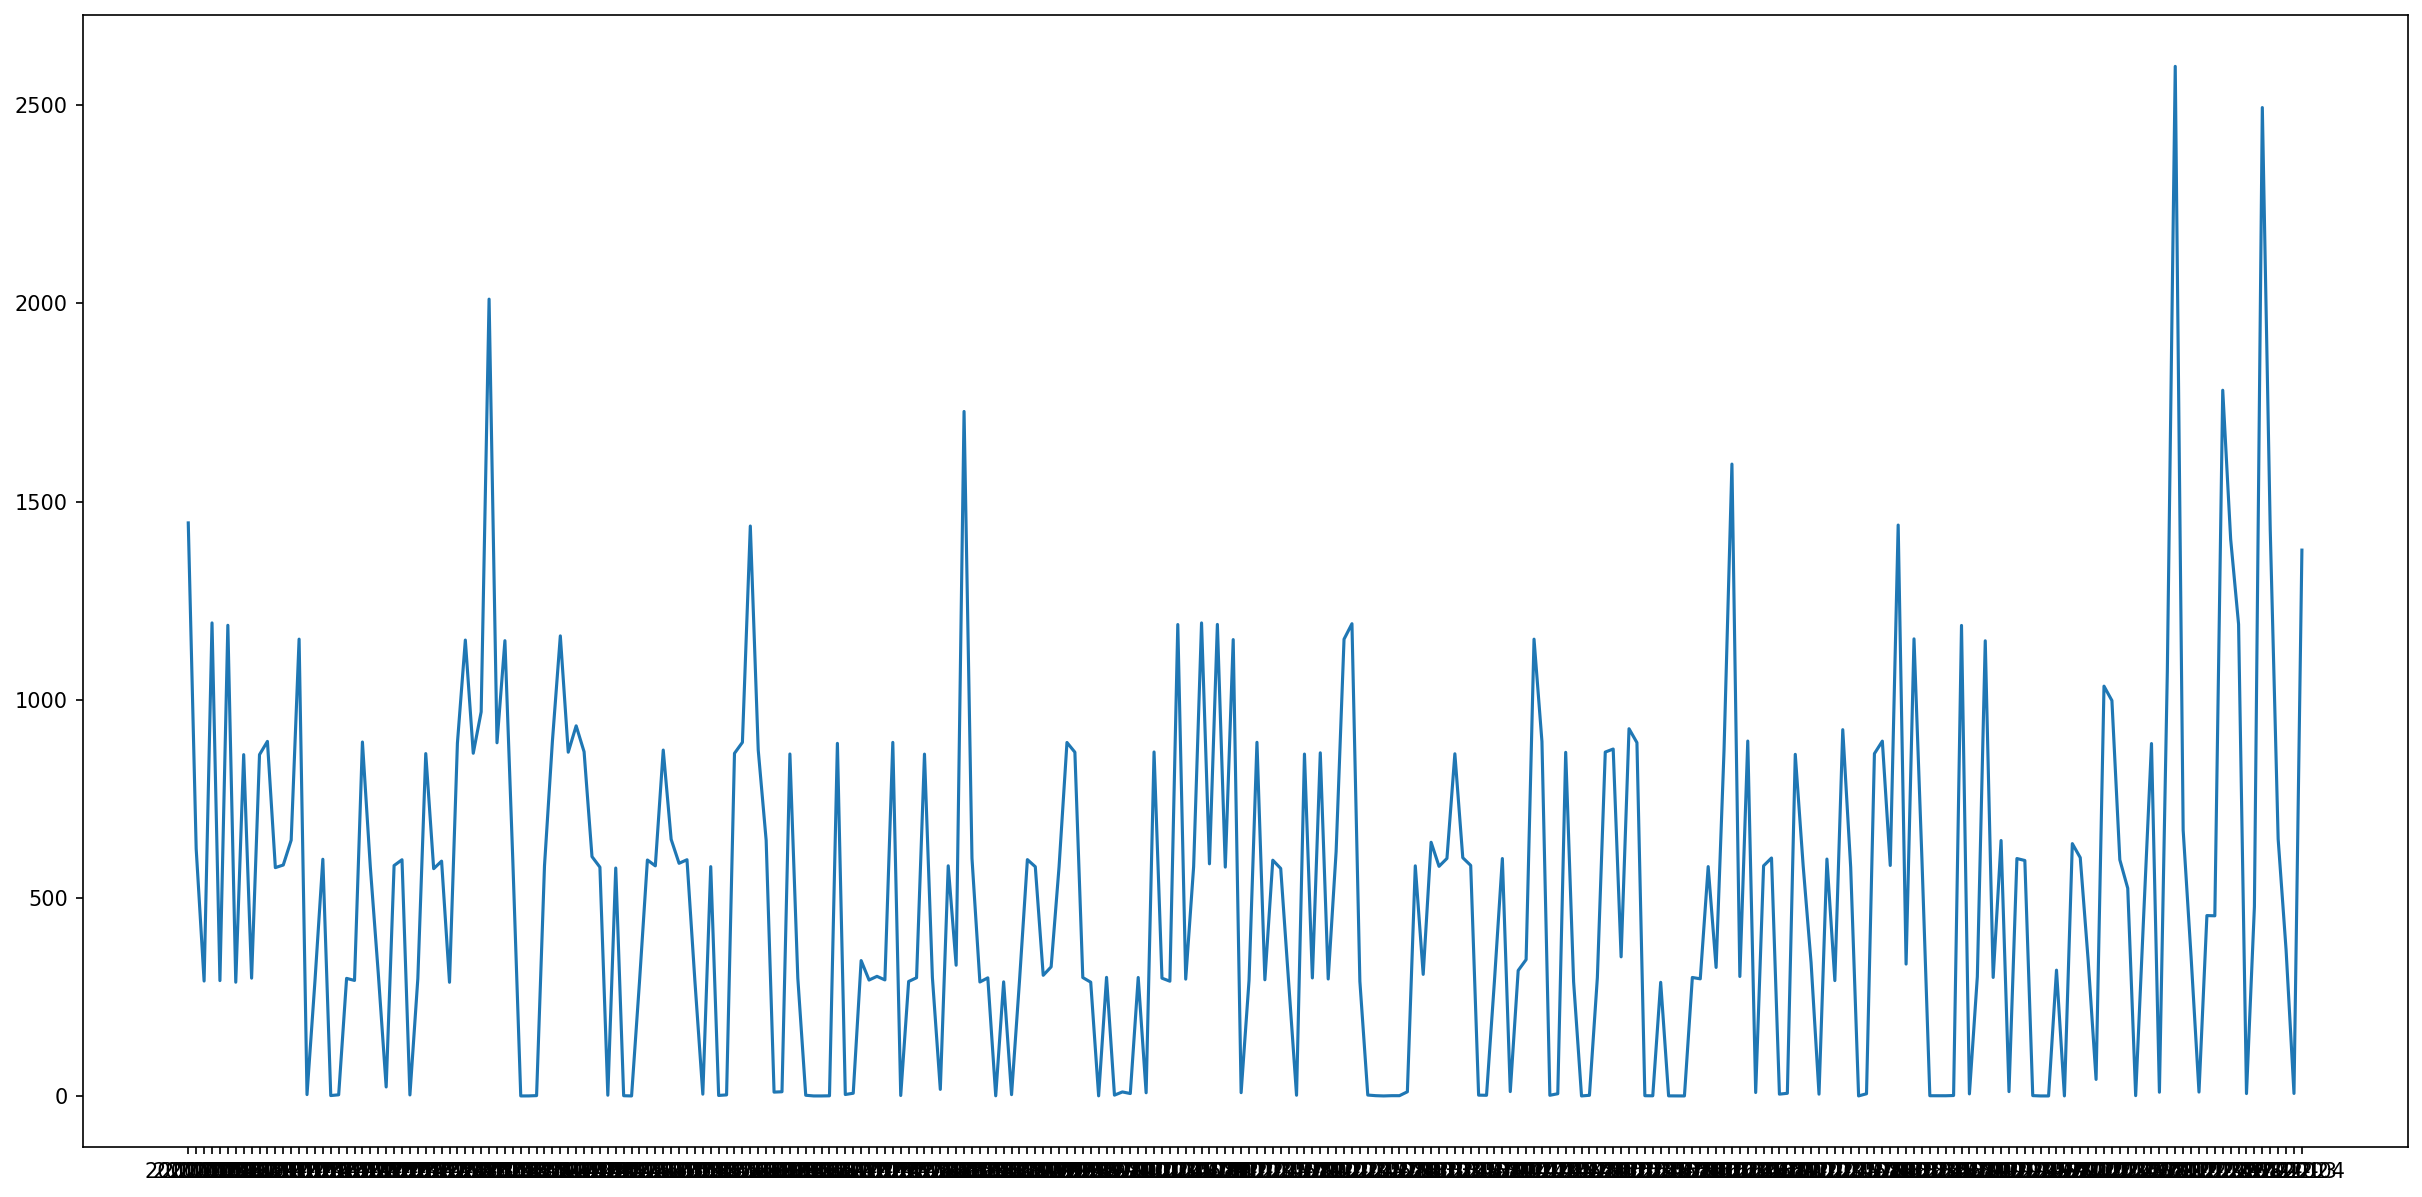

In [17]:
plt.figure(figsize=(20, 10), dpi=150)
plt.plot(df.index, df['RR'], color='tab:blue')
plt.show()

In [18]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2021-12,1428.944000
2022-01,648.321429
2022-02,369.032000


In [19]:
# gunakan ini jika ingin menggunakan data test dengan 12/24 bulan terakhir

df.drop(df.tail(12).index,inplace=True)

In [20]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2020-12,2597.945833
2021-01,670.696296
2021-02,351.570370


In [21]:
testing

,RR
tahun_bulan,
2021-05,454.580000
2021-06,1780.764000
2021-07,1405.252632
2021-08,1190.380000
2021-09,5.968421
2021-10,477.373684
2021-11,2494.004000
2021-12,1428.944000
2022-01,648.321429


<AxesSubplot:xlabel='tahun_bulan'>

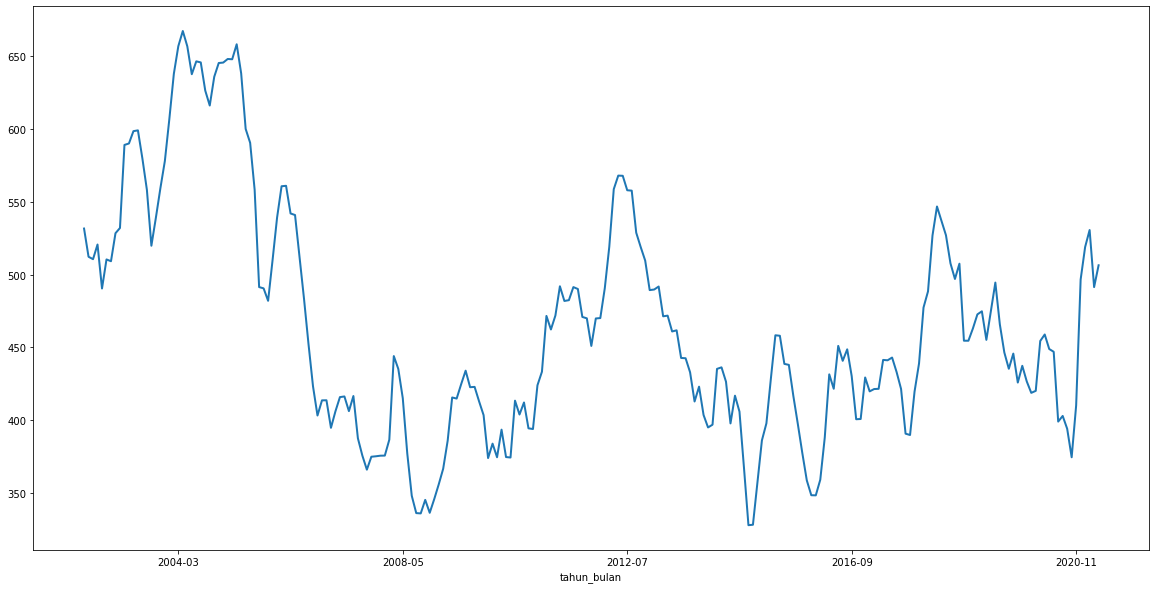

In [22]:
avg_data = df['RR'].rolling(window=30).mean()
avg_data.plot(figsize=(20, 10), linewidth=2, color='tab:blue')

In [23]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2020-12,2597.945833
2021-01,670.696296
2021-02,351.570370


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df['RR'].values,
                                model='additive', extrapolate_trend='freq', freq=12)

plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot().suptitle('', fontsize=15)
plt.show()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [27]:
#Forecasting With SARIMA Model

import itertools

p = d = q = range(0, 2)
#generate patterns from p,q,r
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for SARIMA..')
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} * {}'.format(pdq[3], seasonal_pdq[2]))

Examples of parameter combinations for SARIMA..
SARIMAX: (0, 0, 1) * (0, 0, 1, 12)
SARIMAX: (0, 0, 1) * (0, 0, 1, 12)
SARIMAX: (0, 1, 0) * (0, 1, 0, 12)
SARIMAX: (0, 1, 1) * (0, 1, 0, 12)


In [28]:
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                df['RR'],
                order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}*{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.84411D+00    |proj g|=  2.48371D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   4.196D-07   7.844D+00
  F =   7.8440475073466818     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)*(0, 0, 0, 12)12 - AIC:4018.152323761501
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     32      1     0     0   1.020D-06   7.072D+00
  F =   7.0722900390853738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)*(1, 0, 1, 12)12 - AIC:3627.0125000117114
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85125D+00    |proj g|=  6.27898D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explo

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31007D+00    |proj g|=  6.15774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   4.189D-05   7.310D+00
  F =   7.3100553370480803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)*(0, 1, 0, 12)12 - AIC:3746.748332568617
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.15710D+00    |proj g|=  1.74566D-02

At iterate   20    f=  7.14790D+00    |proj g|=  2.11003D-01

At iterate   25    f=  7.05041D+00    |proj g|=  1.37622D-01

At iterate   30    f=  7.03545D+00    |proj g|=  8.46823D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     37      1     0     0   1.987D-04   7.035D+00
  F =   7.0352938090787900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)*(1, 0, 1, 12)12 - AIC:3610.0704302483405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 0, 1)*(1, 1, 0, 12)12 - AIC:3504.3637877434394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76044D+00    |proj g|=  8.49546D-02

At iterate    5    f=  6.74317D+00    |proj g|=  2.10492D-03

At iterate   10    f=  6.74287D+00    |proj g|=  1.32402D-02

At iterate   15    f=  6.71491D+00    |proj g|=  1.59692D-01

At iterate   20    f=  6.67234D+00    |proj g|=  2.02410D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   8.615

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.95583D+00    |proj g|=  1.58005D-02

At iterate   15    f=  6.94026D+00    |proj g|=  1.27093D-01

At iterate   20    f=  6.91514D+00    |proj g|=  1.31651D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     23      1     0     0   2.892D-07   6.915D+00
  F =   6.9151441334231052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)*(0, 1, 1, 12)12 - AIC:3544.55379631263
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.25430D+00    |proj g|=  8.77129D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   8.771D-06   7.254D+00
  F =   7.2542965746025683     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)*(1, 0, 1, 12)12 - AIC:3720.199846196515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01508D+00    |proj g|=  7.08367D-06

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.04363D+00    |proj g|=  8.90828D-03

At iterate   15    f=  7.04321D+00    |proj g|=  1.12004D-01

At iterate   20    f=  7.04004D+00    |proj g|=  1.09057D-01

At iterate   25    f=  7.03936D+00    |proj g|=  2.88036D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     35      1     0     0   2.880D-06   7.039D+00
  F =   7.0393628187236068     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)*(0, 0, 1, 12)12 - AIC:3610.1537631864867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.77417D+00    |proj g|=  4.96686D-03

At iterate   15    f=  6.76884D+00    |proj g|=  1.56136D-01

At iterate   20    f=  6.68306D+00    |proj g|=  8.23833D-02

At iterate   25    f=  6.67792D+00    |proj g|=  5.53997D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     32      1     0     0   4.623D-06   6.678D+00
  F =   6.6779124297983099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)*(0, 1, 1, 12)12 - AIC:3425.0911640567347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.09952D+00    |proj g|=  8.88504D-04

At iterate   10    f=  7.09951D+00    |proj g|=  1.18760D-02

At iterate   15    f=  7.09882D+00    |proj g|=  1.41291D-01

At iterate   20    f=  7.09481D+00    |proj g|=  2.15575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     36      1     0     0   5.726D-05   7.095D+00
  F =   7.0947865565659747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)*(1, 0, 0, 12)12 - AIC:3638.530716961779
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.


  ys=-5.167E-04  -gs= 3.482E-04 BFGS update SKIPPED

At iterate   10    f=  6.87786D+00    |proj g|=  1.51384D-03

At iterate   15    f=  6.85767D+00    |proj g|=  1.57386D-01

At iterate   20    f=  6.83287D+00    |proj g|=  5.41690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     36      1     1     0   3.089D-06   6.832D+00
  F =   6.8316264782826144     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)*(1, 1, 0, 12)12 - AIC:3503.7927568806986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0        

 This problem is unconstrained.



At iterate    5    f=  6.76915D+00    |proj g|=  2.79194D-03

At iterate   10    f=  6.76899D+00    |proj g|=  6.70668D-03

At iterate   15    f=  6.75200D+00    |proj g|=  1.26669D-01

At iterate   20    f=  6.67422D+00    |proj g|=  6.28796D-02

At iterate   25    f=  6.67180D+00    |proj g|=  1.17030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     36      1     0     0   7.816D-06   6.672D+00
  F =   6.6717984133929438     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)*(1, 1, 1, 12)12 - AIC:3423.960787657187
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 0, 0)*(0, 0, 1, 12)12 - AIC:3687.3050436078524
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33673D+00    |proj g|=  4.87814D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.878D-06   7.337D+00
  F =   7.3367253814576463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)*(0, 1, 0, 12)12 - AIC:3760.403395306315
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.06144D+00    |proj g|=  4.75301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     43      1     0     0   1.523D-01   7.061D+00
  F =   7.0613606920337713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)*(1, 0, 1, 12)12 - AIC:3623.416674321291
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.82811D+00    |proj g|=  5.29940D-02

At iterate    5    f=  6.82567D+00    |proj g|=  1.51582D-03

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.77467D+00    |proj g|=  7.63847D-04

At iterate   10    f=  6.77378D+00    |proj g|=  2.21025D-02

At iterate   15    f=  6.72376D+00    |proj g|=  1.13994D-01

At iterate   20    f=  6.69915D+00    |proj g|=  2.06538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   9.620D-06   6.699D+00
  F =   6.6991474257143562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)*(1, 1, 1, 12)12 - AIC:3437.9634819657504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.07198D+00    |proj g|=  7.87069D-01

At iterate   15    f=  7.07157D+00    |proj g|=  4.38190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     39      1     0     0   4.382D-04   7.072D+00
  F =   7.0715684179486740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)*(0, 0, 1, 12)12 - AIC:3628.643029989721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30532D+00    |proj g|=  1.19629D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.74338D+00    |proj g|=  1.74158D-03

At iterate   15    f=  6.74013D+00    |proj g|=  1.44627D-02

At iterate   20    f=  6.71736D+00    |proj g|=  1.33796D-01

At iterate   25    f=  6.68271D+00    |proj g|=  1.48404D-03

At iterate   30    f=  6.67854D+00    |proj g|=  5.08077D-02

At iterate   35    f=  6.67453D+00    |proj g|=  1.23007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     60      1     0     0   3.983D-06   6.675D+00
  F =   6.6745295860842440     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)*(0, 1, 1, 12)12 - AIC:3425.35914807

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08586D+00    |proj g|=  3.40498D-01

At iterate    5    f=  7.04340D+00    |proj g|=  3.57341D-02

At iterate   10    f=  7.04173D+00    |proj g|=  2.31758D-02

At iterate   15    f=  7.04155D+00    |proj g|=  1.17150D-03

At iterate   20    f=  7.04141D+00    |proj g|=  2.94623D-02

At iterate   25    f=  7.03682D+00    |proj g|=  3.99574D-02

At iterate   30    f=  7.03040D+00    |proj g|=  1.00303D-02

At iterate   35    f=  7.03034D+00    |proj g|=  1.20453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


SARIMA(1, 0, 1)*(1, 1, 0, 12)12 - AIC:3483.674329494417
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75519D+00    |proj g|=  8.36758D-02

At iterate    5    f=  6.73813D+00    |proj g|=  4.27573D-03

At iterate   10    f=  6.73767D+00    |proj g|=  7.50304D-04


 This problem is unconstrained.



At iterate   15    f=  6.73725D+00    |proj g|=  1.19333D-02

At iterate   20    f=  6.71268D+00    |proj g|=  2.21474D-01

At iterate   25    f=  6.67614D+00    |proj g|=  1.19811D-02

At iterate   30    f=  6.67572D+00    |proj g|=  4.88602D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   3.341D-05   6.676D+00
  F =   6.6756999960398815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)*(1, 1, 1, 12)12 - AIC:3427.9583979724193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.88473D+00    |proj g|=  6.42194D-04

At iterate   10    f=  6.88456D+00    |proj g|=  1.08397D-02

At iterate   15    f=  6.86590D+00    |proj g|=  1.28429D-01

At iterate   20    f=  6.81346D+00    |proj g|=  1.17331D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   2.128D-06   6.813D+00
  F =   6.8133494786592728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)*(0, 1, 1, 12)12 - AIC:3494.4349330735477
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   8.624D-06   7.178D+00
  F =   7.1778177403476882     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)*(1, 0, 0, 12)12 - AIC:3681.0426830580163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18050D+00    |proj g|=  6.98878D-02

At iterate    5    f=  7.17836D+00    |proj g|=  1.07369D-02

At iterate   10    f=  7.17290D+00    |proj g|=  5.36944D-02

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.87843D+00    |proj g|=  2.07695D-03

At iterate   10    f=  6.87839D+00    |proj g|=  3.33275D-03

At iterate   15    f=  6.87412D+00    |proj g|=  4.80154D-02

At iterate   20    f=  6.81147D+00    |proj g|=  1.04477D-01

At iterate   25    f=  6.80527D+00    |proj g|=  1.01433D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   8.411D-08   6.805D+00
  F =   6.8052656895008097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)*(1, 1, 1, 12)12 - AIC:3492.2960330244146
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.02042D+00    |proj g|=  3.23949D-02

At iterate   10    f=  7.02039D+00    |proj g|=  1.06271D-03

At iterate   15    f=  7.02039D+00    |proj g|=  5.82488D-03

At iterate   20    f=  7.02024D+00    |proj g|=  6.84096D-02

At iterate   25    f=  7.01623D+00    |proj g|=  2.09040D-01

At iterate   30    f=  7.01212D+00    |proj g|=  4.92855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     42      1     0     0   9.009D-05   7.012D+00
  F =   7.0121178068016707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)*(0, 0, 1, 12)12 - AIC:3598.20431708

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.28942D+00    |proj g|=  1.22573D-02

At iterate   10    f=  7.28933D+00    |proj g|=  4.45762D-03

At iterate   15    f=  7.28924D+00    |proj g|=  6.07520D-02

At iterate   20    f=  7.28503D+00    |proj g|=  2.12088D-01

At iterate   25    f=  7.28351D+00    |proj g|=  3.17367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     34      1     0     0   3.915D-06   7.284D+00
  F =   7.2835094791547821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)*(0, 1, 0, 12)12 - AIC:3735.1568533272484
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.



At iterate   20    f=  7.04503D+00    |proj g|=  1.75953D-01

At iterate   25    f=  7.04069D+00    |proj g|=  4.78975D-03

At iterate   30    f=  7.04069D+00    |proj g|=  3.33461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     42      1     0     0   3.101D-05   7.041D+00
  F =   7.0406857697134875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)*(1, 0, 0, 12)12 - AIC:3612.8311140933056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate   15    f=  7.01828D+00    |proj g|=  6.46807D-02

At iterate   20    f=  7.01707D+00    |proj g|=  5.60747D-04

At iterate   25    f=  7.01706D+00    |proj g|=  5.27869D-03

At iterate   30    f=  7.01526D+00    |proj g|=  6.83582D-02

At iterate   35    f=  7.00562D+00    |proj g|=  1.70575D-02

At iterate   40    f=  7.00521D+00    |proj g|=  4.15838D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     54      1     0     0   3.652D-06   7.005D+00
  F =   7.0052126857970878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)*(1, 0, 1, 12)12 - AIC:3596.66889512

 This problem is unconstrained.



At iterate    5    f=  6.83590D+00    |proj g|=  4.06123D-02

At iterate   10    f=  6.83426D+00    |proj g|=  1.43701D-02

At iterate   15    f=  6.83208D+00    |proj g|=  1.13253D-01

At iterate   20    f=  6.78526D+00    |proj g|=  2.00492D-01

At iterate   25    f=  6.77875D+00    |proj g|=  3.88019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     47      1     0     0   2.292D-06   6.779D+00
  F =   6.7787408568648990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)*(1, 1, 0, 12)12 - AIC:3478.7153187148283
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.



At iterate   10    f=  6.76243D+00    |proj g|=  7.92403D-04

At iterate   15    f=  6.76223D+00    |proj g|=  1.79070D-02

At iterate   20    f=  6.74969D+00    |proj g|=  4.54033D-01

At iterate   25    f=  6.65786D+00    |proj g|=  1.92599D-02

At iterate   30    f=  6.65736D+00    |proj g|=  1.25285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   4.880D-05   6.657D+00
  F =   6.6573590267913154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)*(1, 1, 1, 12)12 - AIC:3418.5678217171535


In [29]:
mod = sm.tsa.statespace.SARIMAX(
    df['RR'],
    order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False)
results = mod.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81328D+00    |proj g|=  6.09520D-02

At iterate    5    f=  6.76356D+00    |proj g|=  3.50018D-02

At iterate   10    f=  6.76243D+00    |proj g|=  7.92403D-04


 This problem is unconstrained.



At iterate   15    f=  6.76223D+00    |proj g|=  1.79070D-02

At iterate   20    f=  6.74969D+00    |proj g|=  4.54033D-01

At iterate   25    f=  6.65786D+00    |proj g|=  1.92599D-02

At iterate   30    f=  6.65736D+00    |proj g|=  1.25285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   4.880D-05   6.657D+00
  F =   6.6573590267913154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [30]:
df.head(1)

,RR
tahun_bulan,
2000-01,1445.958065


In [31]:
# disini angka 12/24 sebagai forecast berapa bulan kedepan

fcast = results.get_forecast(steps=12)

forecast = pd.DataFrame(fcast.predicted_mean)
forecast.columns = ['RR']

forecast

,RR
2021-05-01,273.126241
2021-06-01,349.471389
2021-07-01,248.491668
2021-08-01,131.679662
2021-09-01,317.715019
2021-10-01,240.087936
2021-11-01,474.888090
2021-12-01,635.471223
2022-01-01,584.248236
2022-02-01,358.209158


In [32]:
forecast = forecast.reset_index()

In [33]:
forecast.head(1)

,index,RR
0,2021-05-01,273.126241


In [34]:
forecast['index'] = forecast['index'].astype(str)

In [35]:
forecast[['tahun', 'bulan', 'tanggal']] = forecast['index'].str.split('-', expand=True)
forecast['tahun_bulan'] = forecast['tahun'] + '-' + forecast['bulan']

In [36]:
forecast.head(1)

,index,RR,tahun,bulan,tanggal,tahun_bulan
0,2021-05-01,273.126241,2021,05,01,2021-05


In [37]:
forecast = forecast.set_index('tahun_bulan')

In [39]:
forecast = forecast[['RR']]

In [40]:
forecast

,RR
tahun_bulan,
2021-05,273.126241
2021-06,349.471389
2021-07,248.491668
2021-08,131.679662
2021-09,317.715019
2021-10,240.087936
2021-11,474.888090
2021-12,635.471223
2022-01,584.248236


In [41]:
testing

,RR
tahun_bulan,
2021-05,454.580000
2021-06,1780.764000
2021-07,1405.252632
2021-08,1190.380000
2021-09,5.968421
2021-10,477.373684
2021-11,2494.004000
2021-12,1428.944000
2022-01,648.321429


<AxesSubplot:xlabel='tahun_bulan'>

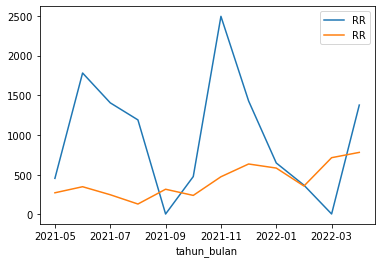

In [42]:
# menampilkan hasil testing 12/24 bulan terakhir

ax = testing.plot()
forecast.plot(ax=ax)

In [43]:
# cek selisih error
from sklearn.metrics import mean_absolute_error

forecast_errors = [forecast['RR'][i]-testing['RR'][i] for i in range(len(forecast))]
print('Forecast Errors: %s' % forecast_errors)

mae = mean_absolute_error(forecast['RR'],testing['RR'])
print('MAE:', mae)

Forecast Errors: [-181.45375936693267, -1431.292611167647, -1156.7609635843787, -1058.700338029823, 311.74659790058786, -237.28574834729784, -2019.1159103234468, -793.472777459576, -64.07319304197858, -10.822842179711984, 708.6405464877386, -595.6808011050518]
MAE: 714.0871740828476


In [ ]:
df

In [ ]:
hasil_fix = pd.concat([df.tail(100), forecast])

In [ ]:
hasil_fix

In [ ]:
forecast.plot(grid=True, figsize=(20,5))
plt.xticks(range(0,len(forecast.index)), forecast.index)
plt.show()

In [ ]:
hasil_fix2 = pd.concat([df, forecast])

plot_hasil = hasil_fix2.reset_index(drop=True)

ax = plot_hasil.plot(ls="-", color="b")
plot_hasil.tail(len(forecast)).plot(ls="--", color="r", ax=ax)

plt.show()

In [ ]:
hasil_fix2.plot()

# Modelling SimpleExp

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [ ]:
df_train = avg_data.iloc[:-12]
df_test = avg_data.iloc[-12:]

In [ ]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(avg_data['RR'])

model = ses.fit()

In [ ]:
forecast = model.forecast(12)
forecast

In [ ]:
forecast.plot()

In [ ]:
forecast = pd.DataFrame(forecast)
forecast.columns = ['RR']

In [ ]:
forecast

In [ ]:
hasil = pd.concat([avg_data, forecast])

In [ ]:
hasil

In [ ]:
hasil = hasil.reset_index(drop=True)

In [ ]:
hasil

In [ ]:
hasil['RR'].tail(len(forecast)).plot()

In [ ]:
ax = hasil['RR'].head(280).plot(ls="-", color="b")
hasil['RR'].tail(len(forecast)).plot(ls="--", color="r", ax=ax)

plt.show()